# Part 1

## Classification

A data mining technique to predict the categorical labels of new observations based on past observations. This involves training a new model on a dataset where each point is labeled. The model learns to predict labels on new instances. Common algorithm are Decision Trees, Random Forest, Naive Bayes, Support Vector Machines, and KNN.

Some strengths: This technique can be allied to finance, healthcare, marketing, and other applications. Making it very versatile. With a lot of sufficient data, classification models can have high accuracy. 

Some weaknesses: The models can be too overfitting, making it seem to good to be true. Choosing what features can be difficult. It may impact performance. 

An example of the Classification technique is the email spam filtering. We did a project on this. We took the dataset and cleaned it up. We then trained the model on specific words and phrases. We then used cross validation to ensure the model is accurate to unseen emails. 

## Prediction

This is where based on historical data, future values can be forecasted. The outcome variable is continuous which can be applied to predicting future trends. Some algorithms are Linear Regression, and Polynomial Regression. The predictive power can be assessed using metrics like Mean Squared Error and the Mean Absolute Error.

Some Strengths: This method helps provide future trends which is valuable in planning and decision making. They can also handle complex relationships like non linear. It is also applicable to many concepts like demand planning and financial forecasting. 

Some Weaknesses: This method relies heavily on quality and quantity of the data. Predicition models can also suffer from overfitting as well. Also data within the range of the model do well, but extremely outside the range does not do so well. 

An example of the Prediction technique is the stock market. We did an assignment on this using the COKE stock dataset. We trained the data on internal factors like volume and opening price. Determined the accuracy of it by using the RMSE. That was just one example using simple factors. More models can be made using more factors in a variety of ways. 

# Introduction

In this project we will use the dry beans classification dataset from the UCI Machine Learning Repository to classify types of beans based on their characteristics, but this is just a byproduct. The main goal of this project is to show the process of creating two different classifiers and choosing the correct classifier for the dataset by properly evaluating both model's performance.

# Data Analysis

Our dataset comes from the UCI Machine Learning Repository that can be found here https://archive.ics.uci.edu/dataset/602/dry+bean+dataset and includes the following features:
1. Area: Numerical feature that represents the area of a bean zone
2. Perimeter: Numerical feature that represents the length of the beans border
3. MajorAxisLength: Numerical feature that represents the distance between the longest line that can be drawn from a bean
4. MinorAxisLength: Numerical feature that represents the longest line that can be drawn from the bean while standing perpendicular to the main axis
5. AspectRatio: Numerical feature that defines the relationship between MajorAxisLength and MinorAxisLength
6. Eccentricity: Numerical feature that represents eccentricity of the ellipse having the same moments as the region
7. ConvexArea: Numerical feature that represents number of pixels in the smallest convex polygon that can contain the area of a bean seed
8. Equivalent diameter: Numerical feature that represents the diameter of a circle having the same area as a bean seed area
9. Extent: Numerical feature that represents the ratio of the pixels in the bounding box to the bean area
10. Solidity: Numerical feature that represents the ratio of the pixels in the convex shell to those found in beans.
11. Roundness: Numerical feature calculated with the following formula: (4piA)/(P^2)
12. Compactness: Numerical feature that represents measures the roundness of an object
13. ShapeFactor1: No explanation, but likely some value that describes the shape of the bean
14. ShapeFactor2: No explanation, but likely some value that describes the shape of the bean
15. ShapeFactor3: No explanation, but likely some value that describes the shape of the bean
16. ShapeFactor4: No explanation, but likely some value that describes the shape of the bean
17. Class: Categorical feature that represents the kind of bean the entry is



## Data Import

In [3]:
import pandas as pd


# Load data from Excel into a DataFrame
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

#Display head
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Basic Data Description

Dataset has 13611 entries with no holes, there is a single categorical feature that will need to be converted to a numerical feature.

In [4]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types of the columns
print("\nData Types:\n", df.dtypes)

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (13611, 17)

Data Types:
 Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

Missing Values:
 Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


## Descriptive Statistics

Wide range of values indicate feature normalization is necessary, also note that some features yield similar statistics so their correlation should be looked into (see eccentricity and extent).

In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Correlation Analysis 

Correlation matrix confirms that some features are highly correlated, this will require some preprocessing to ensure we are only using relevant features to optimize performance.

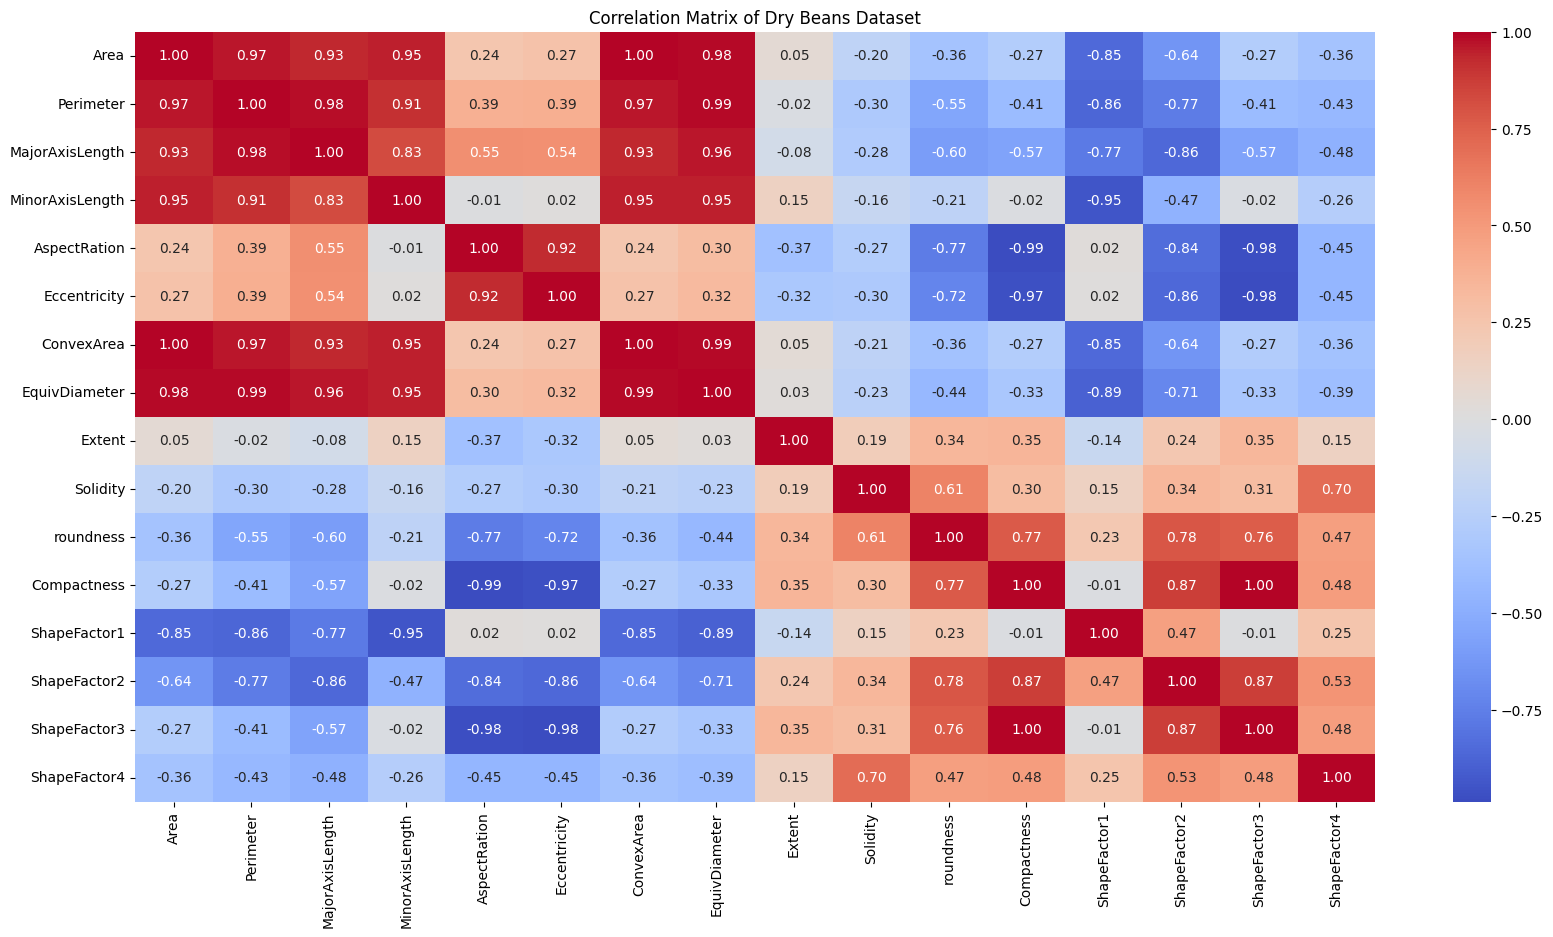

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only the numerical columns (excluding the last categorical feature)
numerical_df = df.select_dtypes(include='number')
# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Dry Beans Dataset')
plt.show()

## Distribution

Histogram shows an uneven distribution between classes with Dermason having significantly more entries and Bombay having significantly less which indicates that classes may need to be balanced.

In [1]:
# Plot count of each class
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


NameError: name 'df' is not defined

# Data Preprocessing

Drop highly correlated features, the threshold will be set at 0.6 because this allows us to filter out the highly correlated features without while keeping the lesser correlated ones.

In [21]:
# Select only the numerical columns (excluding the last categorical feature)
numerical_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# threshold
threshold = 0.6

# Find pairs of features with high correlation
highly_correlated_pairs = (correlation_matrix > threshold) & (correlation_matrix < 1)

# Identify features to drop
features_to_drop = set()
for i in range(len(highly_correlated_pairs.columns)):
    for j in range(i+1, len(highly_correlated_pairs.columns)):
        if highly_correlated_pairs.iloc[i, j]:
            # drop the feature that is most correlated with other features
            if correlation_matrix.iloc[i, :].mean() > correlation_matrix.iloc[j, :].mean():
                features_to_drop.add(highly_correlated_pairs.columns[i])
            else:
                features_to_drop.add(highly_correlated_pairs.columns[j])

# Drop the selected features
df = df.drop(columns=features_to_drop)

# Print the reduced DataFrame
df.head()

,MajorAxisLength,AspectRation,Extent,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
0,208.178117,1.197191,0.763923,0.007332,0.003147,0.998724,SEKER
1,200.524796,1.097356,0.783968,0.006979,0.003564,0.998430,SEKER
2,212.826130,1.209713,0.778113,0.007244,0.003048,0.999066,SEKER
3,210.557999,1.153638,0.782681,0.007017,0.003215,0.994199,SEKER
4,201.847882,1.060798,0.773098,0.006697,0.003665,0.999166,SEKER


Map categorical values to numerical 

In [24]:
# Define a mapping dictionary for manual encoding
class_mapping = {
    'SEKER': 0,
    'BARBUNYA': 1,
    'BOMBAY': 2,
    'CALI': 3,
    'HOROZ': 4,
    'SIRA': 5,
    'DERMASON': 6
}


# Map the class labels to numerical values using the mapping dictionary
df['Class_encoded'] = df['Class'].map(class_mapping)

Normalize numerical features

In [28]:
from sklearn.preprocessing import StandardScaler

# Select the column labels of the first 6 columns
selected_columns = df.columns[:6]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns and assign the scaled values back to the DataFrame
df.loc[:, selected_columns] = scaler.fit_transform(df.loc[:, selected_columns])
df.head()

,MajorAxisLength,AspectRation,Extent,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class,Class_encoded
0,-1.306598,-1.565053,0.289087,0.680786,2.402173,0.838371,SEKER,0
1,-1.395911,-1.969784,0.697477,0.367967,3.100893,0.771138,SEKER,0
2,-1.252357,-1.514291,0.578195,0.603129,2.235091,0.916755,SEKER,0
3,-1.278825,-1.741618,0.671260,0.401718,2.515075,-0.197985,SEKER,0
4,-1.380471,-2.117993,0.476020,0.118268,3.270983,0.939640,SEKER,0


# Analytical Model Description

## KNN

K Nearest Neighbor (KNN) is a simple classification algorithm that uses neighboring points to classify a given entry where K is the number of neighbors it considers. To classify the entry the algorithm simply uses the majority and in cases where there are ties it is random, but it is good practice to choose an odd k value to avoid these situations. The computations lie in determining the nearest neighbors, which is done by applying a distance formula to the new entry and every other point in the dataset. Commonly used distance formulas are...


<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <tmulas</title>
</head>
<body>Formulas</h2>
  <ul>
    <li>
      <h3>Euclidean Distance</h3>
      <p>The Euclidean distance between two points \( (x_1, y_1) \) and \( (x_2, y_2) \) in a 2-dimensional space is given by:</p>
      <p>$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$</p>
    </li>
    <li>
      <h3>Manhattan Distance</h3>
      <p>The Manhattan distance between two points \( (x_1, y_1) \) and \( (x_2, y_2) \) in a 2-dimensional space is given by:</p>
      <p>$$ d = |x_2 - x_1| + |y_2 - y_1| $$</p>
    </li>
    <li>
      <h3>Chebyshev Distance</h3>
      <p>The Chebyshev distance between two points \( (x_1, y_1) \) and \( (x_2, y_2) \) in a 2-dimensional space is given by:</p>
      <p>$$ d = \max(|x_2 - x_1|, |y_2 - y_1|) $$</p>
    </li>
  </ul>
</body>
</html>


## Support Vector Machine (SVM)

SVM classifiers work very similar to logistic regression where the goal is to find a decision boundary (line, plane, etc) that best represents the data and when classifying a new entry it considers the entries position relative to that boundary. The distinction/benefit of SVM classifiers is that they usually involve manipulating the data in some form to make it easier to place a decision boundary. Manipulating the data will usually result in an increase in dimmensionality which necessitates the use of hyper planes. Data is manipulated by applying a kernel function to the features, kernel functions may look like...


<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <ttions</title>
</head>
<body>unctions</h2>
  <ul>
    <li>
      <h3>Linear Kernel</h3>
      <p>The linear kernel is the simplest kernel function and is defined as:</p>
      <p>$$ K(\mathbf{x}, \mathbf{y}) = \mathbf{x}^T \cdot \mathbf{y} $$</p>
      <p>where \( \mathbf{x} \) and \( \mathbf{y} \) are input vectors.</p>
    </li>
    <li>
      <h3>Polynomial Kernel</h3>
      <p>The polynomial kernel is defined as:</p>
      <p>$$ K(\mathbf{x}, \mathbf{y}) = (\gamma \cdot \mathbf{x}^T \cdot \mathbf{y} + r)^d $$</p>
      <p>where \( \gamma \) is a scale factor, \( r \) is an optional coefficient, and \( d \) is the degree of the polynomial.</p>
    </li>
    <li>
      <h3>RBF (Radial Basis Function) Kernel</h3>
      <p>The radial basis function (RBF) kernel, also known as the Gaussian kernel, is defined as:</p>
      <p>$$ K(\mathbf{x}, \mathbf{y}) = e^{-\gamma \cdot ||\mathbf{x} - \mathbf{y}||^2} $$</p>
      <p>where \( \gamma \) is a scale factor controlling the kernel's width.</p>
    </li>
  </ul>
</body>
</html>


# Pipeline

Our pipeline consisted of:
1. Data Collection: imported an existing dataset from Kaggle
2. Data Exploration: performed initial analysis on data to gain a better understanding
3. Data Preprocessing: cleaned up data and made it suitable for training
4. Model Selection: chose appropiate model based on nature of problem and data
5. Model Training: trained our model with our training data
6. Model Testing: tested our model with our testing set
7. Model Optimization: ensured model performance is as good as possible
8. Performance Analysis: measured our model with various metrics to ensure its performance is optimal

# Assumption Verification

In terms of assumptions, its important to consider that this dataset works with beans (which are relatively small) and most of the features involve some sort of measurement so we must assume that the data was gathered precisely with sophisticated tools. For future predictions, the model is built with data from only 7 different types of beans, which does not account for all the beans in the world, so this model assumes it receives beans from the existing classes as input therefore it will only give accurate predictions for beans belonging to those 7 classes.

# Implementation

In order to implement the model we used pandas to load in the data, sklearn to build the model, matplotlib to visualize the data, and numpy for mathematical computations

# KNN Model

## Deployment

Split Data

In [38]:
from sklearn.model_selection import train_test_split
import numpy as np

#drop target column
columns_to_drop = ['Class', 'Class_encoded']
X = df.drop(columns_to_drop, axis = 1)

#Identify target variable
y = df['Class_encoded']

# Split the data into a 70% training set and a 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Determine best K value

Execution Time: 10.273969173431396 seconds
Minimum error: 0.09941234084231146 at K = 38


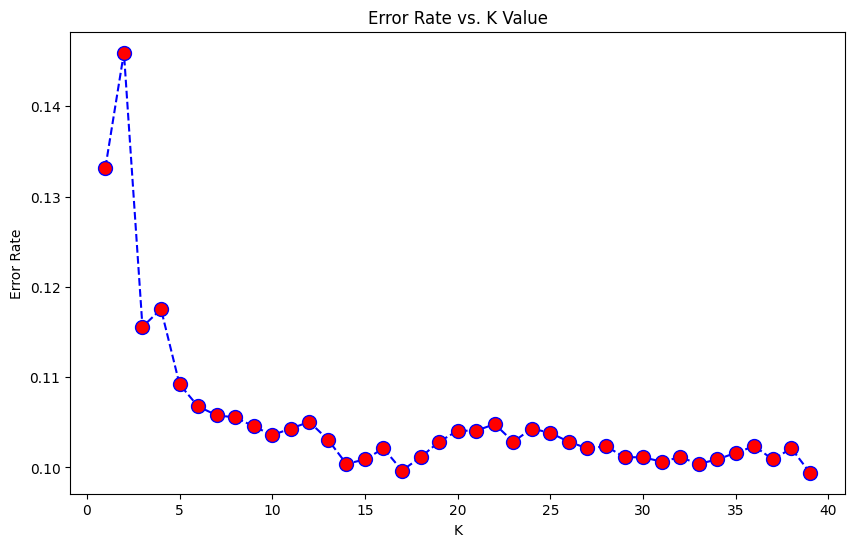

In [82]:
import time
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Start measuring time
start_time = time.time()

error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Calculate execution time
execution_time = time.time() - start_time
print("Execution Time:", execution_time, "seconds")
print("Minimum error:", min(error_rate), "at K =", error_rate.index(min(error_rate)))


## Execution

Create model using best performing K value. Accuracy of about 89% shows that our model performs well on a subset of our data and cross validation accuracy of 90% shows that the same stands true for multiple subsets of our data, indicating that our model generalizes well.

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=38)  # You can adjust the number of neighbors (k) as needed

# Perform cross-validation on the training data
cross_val_scores = cross_val_score(knn_classifier, X_train, y_train, cv=12) 

# Train the KNN classifier on the entire training data
knn_classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Accuracy: 0.8978942213516161
Cross-validation scores: [0.90680101 0.91057935 0.88161209 0.91687657 0.89042821 0.8929471
 0.90680101 0.88916877 0.89672544 0.89672544 0.90302267 0.90416141]
Mean cross-validation score: 0.8996540891490721


## Error Estimation

Looking at the precision for each class we see very good numbers with most of them falling in the 80% to 90% range, which tells us that when our model predicts that an entry belongs to a class it is usually correct. If we also consider our high recall numbers, also 80% to 90%, we can determine that our model is also capturing a majority of the positive cases(with respect to the class).

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       619
           1       0.83      0.81      0.82       395
           2       1.00      1.00      1.00       161
           3       0.88      0.85      0.87       479
           4       0.97      0.95      0.96       588
           5       0.84      0.89      0.87       799
           6       0.92      0.91      0.91      1043

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.91      0.90      0.90      4084



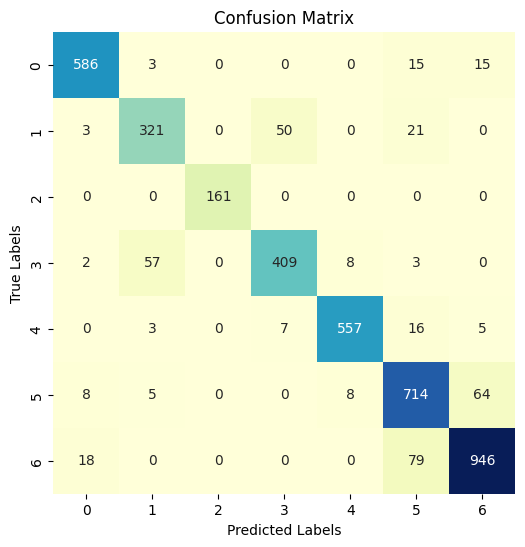

In [86]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Plot the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', square=True, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Model Validation

In order to validate the model we split the training set into a 70/30 ratio to have a good percentage of our data act as a testing set. We also used cross validation to ensure that our model generalizes well to different subsets of our data. To quantify the error we used precision and recall then visualized with a confusion matrix heat map. We feel these metrics give us valuable insight to our models performance allowing us to properly evaluate the performance.

## Results

In terms of results our model KNN yielded...
Accuracy = 89.78%
Mean Cross Validation Accuracy = 90.00%
Mean Precision Across Classes = 91.00%
Mean Recall Across Classes = 90.00%

## Analysis 

Putting everything together we can confidently say that this model has adapted to the dataset well and can accurately predict the bean type based on the features. We can say this because the Mean Cross validation Accuracy indicates that the model generalizes well to new data and a high precison and recall indicate that the model both has a high accuracy when predicting all classes and is able to capture the majority of positives of all classes.

# SVM Model

## Deployment

Split Data

In [77]:
#drop target column
columns_to_drop = ['Class', 'Class_encoded']
X = df.drop(columns_to_drop, axis = 1)

#Identify target variable
y = df['Class_encoded']

# Split the data into a 70% training set and a 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Start measuring time
start_time = time.time()

# define grid
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
]

# Initialize SVM classifier
svm = SVC()

# Initialize GridSearchCV with SVM classifier and parameter grid
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Calculate execution time
execution_time = time.time() - start_time

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)
print("Execution Time:", execution_time, "seconds")


Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score (Accuracy): 0.9075250693348537
Execution Time: 167.34497046470642 seconds


## Execution

#Create Support Vector Classifier with best parameters. Accuracy of 90.45% indicates that our model performs well on a subset of our data and a mean cross validation accuracy of 90.74% tells us that our model generalizes well to new data.

In [80]:
# Instantiate the SVM classifier
svm_classifier = SVC(kernel='rbf', C=100, gamma = 0.01)  # Linear kernel with regularization parameter C=1.0

# Perform cross-validation on the training data
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=12) 

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Accuracy: 0.9045053868756121
Cross-validation scores: [0.91435768 0.9256927  0.88539043 0.9231738  0.89420655 0.90554156
 0.91813602 0.90050378 0.90428212 0.90554156 0.90554156 0.90668348]
Mean cross-validation score: 0.9074209365533643


## Error Estimation

Looking at the precision for each class we see very good numbers with most of them falling in the 80% to 100% range, which tells us that when our model predicts that an entry belongs to a class it is usually correct. If we also consider our high recall numbers, also 80% to 100%, we can determine that our model is also capturing a majority of the positive cases(with respect to the class).

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       619
           1       0.83      0.81      0.82       395
           2       1.00      1.00      1.00       161
           3       0.88      0.85      0.87       479
           4       0.97      0.95      0.96       588
           5       0.84      0.89      0.87       799
           6       0.92      0.91      0.91      1043

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.91      0.90      0.90      4084

Confusion Matrix:


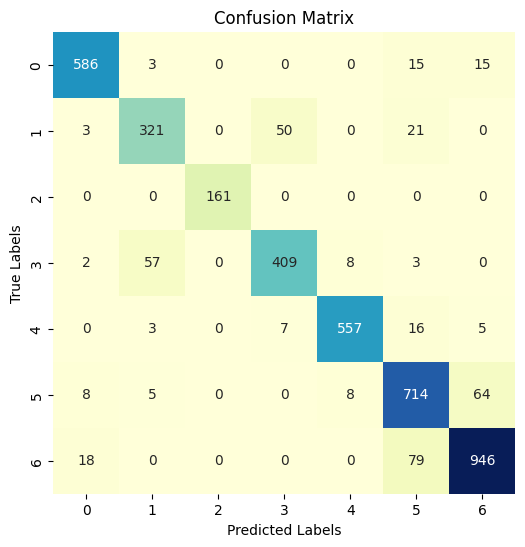

In [85]:


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


print("Confusion Matrix:")
# Plot the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', square=True, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Results

In [ ]:
In terms of results our model yielded...
Accuracy = 90.45%%
Mean Cross Validation Accuracy = 90.74%
Mean Precision Across Classes = 91.00%
Mean Recall Across Classes = 91.00%

## Analysis

Putting everything together we can confidently say that this model has adapted to the dataset well and can accurately predict the bean type based on the features. We can say this because the Mean Cross validation Accuracy indicates that the model generalizes well to new data and a high precison and recall indicate that the model both has a high accuracy when predicting all classes and is able to capture the majority of positives of all classes.

## Model Validation

In order to validate the model we split the training set into a 70/30 ratio to have a good percentage of our data act as a testing set. We also used cross validation to ensure that our model generalizes well to different subsets of our data. To quantify the error we used precision and recall then visualized with a confusion matrix heat map. We feel these metrics give us valuable insight to our models performance allowing us to properly evaluate the performance.

# Model Improvement

In terms of improvements, as was stated in the data analysis section, the dataset has a large with the least dominant class having around 500 entries and the most dominant having around 3500. This imbalance could lead to complications with the model so adding features of the minority class would be a good improvement. Another improvement would be the analysis section not including the ROC curve, at the time of creating this model I am unsure how to make an ROC curve for mutliclass problems so we are missing out on some information. Experimenting with other features is another potential improvement, in this case we removed highly correlated features but moving around the correlating threshold could alter the performance. Specifically for SVM theres a chance theres a better combination of parameters but the parameters we found perform well enough that we feel its unnecessary to computer more combinations. The same applies for different K values in our KNN model, the performance is good enough that we don't think it's necessary to compute more K values.

# Conclusion

After implementing and analzing both models we've found that they performed very similarly with the SVM model performing very slightly better, by about a percent across most metrics. Althought this is the case it's worth noting that finding the most effective parameters for the SVM model took significantly longer than finding the best K value for the KNN model. Since the KNN model is more computationaly efficient and performs incredibly similar we feel that the KNN model is superior in this case.